In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score

warnings.filterwarnings('ignore')

Đọc dữ liệu và chuyển vào DataFrame

In [2]:
path = '../../data/KNN_Binary_Classifier_Logistic_Regression/framingham.csv'

df = pd.read_csv(path)
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Kiểm tra dữ liệu 

In [3]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Xóa dữ liệu `na`

In [4]:
df = df.dropna(how='any', axis=0)

In [5]:
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

Giảm chiều dữ liệu về 2 sử dụng PCA

In [6]:
pca = PCA(2)
X_pca = pca.fit_transform(X)

Trực quan hóa dữ liệu sau khi giảm chiều

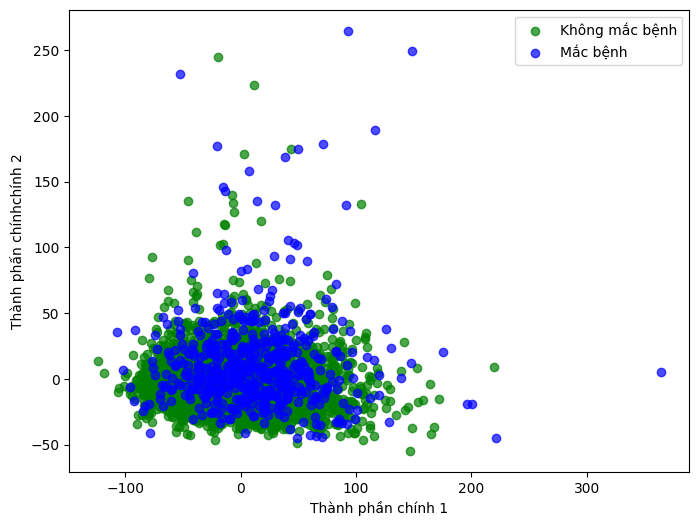

In [7]:
labels = ['Không mắc bệnh', 'Mắc bệnh']
colors = ['green', 'blue']

plt.figure(figsize=(8, 6))
for label in y.unique():
    plt.scatter(X_pca[y==label, 0], X_pca[y==label, 1], alpha=0.7, label=labels[label], c=colors[label])
    
plt.xlabel("Thành phần chính 1")
plt.ylabel("Thành phấn chínhchính 2")
plt.legend()
plt.show()

Khời tạo các mô hình cần thiết và chia train : test tỷ lệ 7 : 3

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18)

perceptron = Perceptron(max_iter=6000, eta0=0.01, tol=1e-6)
logR = LogisticRegression()
nb = GaussianNB()

Khởi tạo hàm để huấn luyện và đánh giá mô hình

In [9]:
def train_estimate_model(model, X_train, X_test, y_train, y_test):
    model_name = type(model).__name__
    print('Đánh giá mô hình', model_name, '\n')
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))

**Sử dụng dữ liệu nguyên bản**

Perceptron

In [10]:
train_estimate_model(perceptron, X_train, X_test, y_train, y_test)

Đánh giá mô hình Perceptron 

Accuracy: 0.8432087511394712
Precision: 0.75
Recall: 0.017241379310344827


In [15]:
print('Weights:', perceptron.coef_)
print('Bias:', perceptron.intercept_)

Weights: [[  2.25     8.66    -4.21    -0.69     6.33     0.29     0.07     3.08
    0.3     -0.94     7.065  -11.48   -10.2404 -10.25     2.47  ]]
Bias: [-1.23]


Logistic Regression

In [11]:
train_estimate_model(logR, X_train, X_test, y_train, y_test)

Đánh giá mô hình LogisticRegression 

Accuracy: 0.837739288969918
Precision: 0.3
Recall: 0.017241379310344827


In [16]:
print('Weights:', logR.coef_)
print('Bias:', logR.intercept_)

Weights: [[ 0.16053455  0.02788608 -0.34993906 -0.08619876  0.0207279   0.03571422
   0.01078433  0.26387189  0.02613524 -0.00085867  0.02203631 -0.02843486
  -0.05946175 -0.02465544  0.00381091]]
Bias: [-0.10833838]


Gaussian Naive Bayes

In [12]:
train_estimate_model(nb, X_train, X_test, y_train, y_test)

Đánh giá mô hình GaussianNB 

Accuracy: 0.8295350957155879
Precision: 0.4392523364485981
Recall: 0.27011494252873564


Giá trị của trọng số càng cao thì mức độ ảnh hưởng đến dự đoán của mô hình càng nhiều.

* `Accuracy`: Của 3 phương pháp gần như nhau, đều hơn 80%.
* `Precision`: Của Perceptron cao nhất ở mức khá, còn của 2 phương pháp còn lại ở mức trung bình thấp.
* `Recall`: Cả 3 phương pháp đều thấp.

**Sử dụng dữ liệu đã giảm chiều**

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=18)

Perceptron

In [18]:
train_estimate_model(perceptron, X_train, X_test, y_train, y_test)

Đánh giá mô hình Perceptron 

Accuracy: 0.7575205104831358
Precision: 0.26288659793814434
Recall: 0.29310344827586204


In [19]:
print('Weights:', perceptron.coef_)
print('Bias:', perceptron.intercept_)

Weights: [[0.30911114 0.46570411]]
Bias: [-14.33]


Logistic Regression

In [20]:
train_estimate_model(logR, X_train, X_test, y_train, y_test)

Đánh giá mô hình LogisticRegression 

Accuracy: 0.845031905195989
Precision: 0.75
Recall: 0.034482758620689655


In [21]:
print('Weights:', logR.coef_)
print('Bias:', logR.intercept_)

Weights: [[0.00785484 0.01663479]]
Bias: [-1.83762882]


Gaussian Naive Bayes

In [22]:
train_estimate_model(nb, X_train, X_test, y_train, y_test)

Đánh giá mô hình GaussianNB 

Accuracy: 0.8386508659981768
Precision: 0.45161290322580644
Recall: 0.08045977011494253


Độ chính xác của Gaussian Naive Bayes và Logistic Regression khá cao ở mức hơn 80%. Còn perceptron thì ở mức khá là 75%.

Mô hình Perceptron bị ảnh hưởng nhiều nhất của việc giảm chiều dữ liệu. Giảm từ 84% về 75%